Note:
1. Assuming only three colors (RGB)
2. Forward Checking -- Backtracking is not performed

# Graph

In [ ]:
australia_map = {
    'WA': ['NT', 'SA'],
    'NT': ['WA', 'SA', 'Q'],
    'SA': ['WA', 'NT', 'Q', 'NSW', 'V'],
    'Q': ['NT', 'SA', 'NSW'],
    'NSW': ['Q', 'SA', 'V'],
    'V': ['SA', 'NSW'],
    'T': []
}

In [ ]:
# degree of each node
degree = sorted([(node,len(australia_map[node])) for node in australia_map], key=lambda x:x[1], reverse=True)
degree

[('SA', 5), ('NT', 3), ('Q', 3), ('NSW', 3), ('WA', 2), ('V', 2), ('T', 0)]

# Map coloring

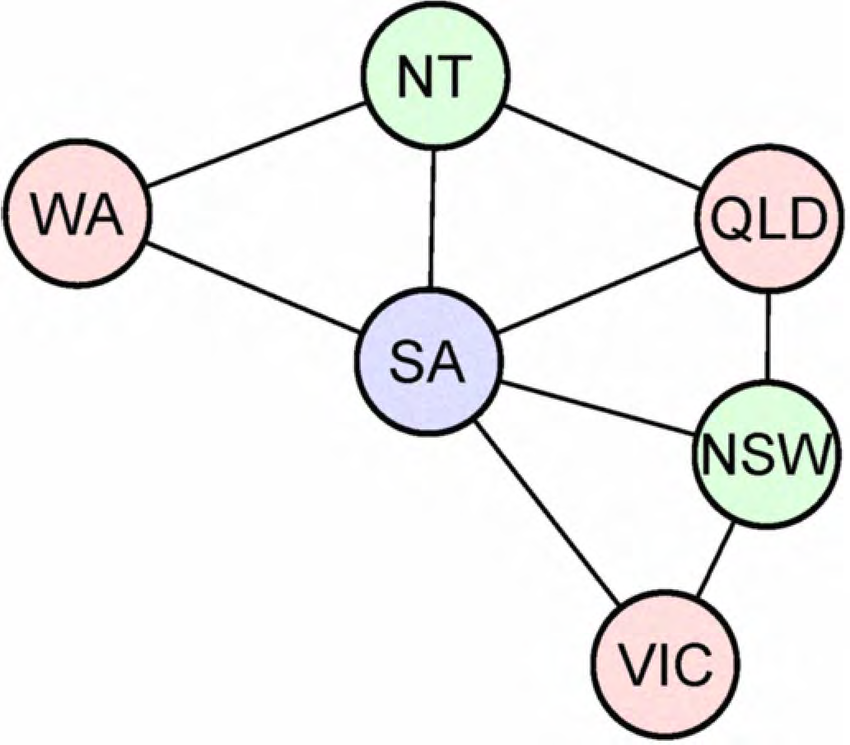


Tasmania (Disjoint node)

In [ ]:
# 3 colors
nodes = ['SA','NT','Q','NSW', 'WA','V','T']
frwd_check = [['R','G','B']]*len(australia_map)
frwd_check

[['R', 'G', 'B'],
 ['R', 'G', 'B'],
 ['R', 'G', 'B'],
 ['R', 'G', 'B'],
 ['R', 'G', 'B'],
 ['R', 'G', 'B'],
 ['R', 'G', 'B']]

In [ ]:
# forward checking -- map coloring implementation
for i in range(len(nodes)):
  frwd_check[i] = frwd_check[i][0]
  for node in australia_map[nodes[i]]:
    frwd_check[nodes.index(node)] = ''.join([char for char in frwd_check[nodes.index(node)] if char != frwd_check[i]])
print(frwd_check)

['R', 'G', 'B', 'G', 'B', 'B', 'R']


In [ ]:
!pip install decorator

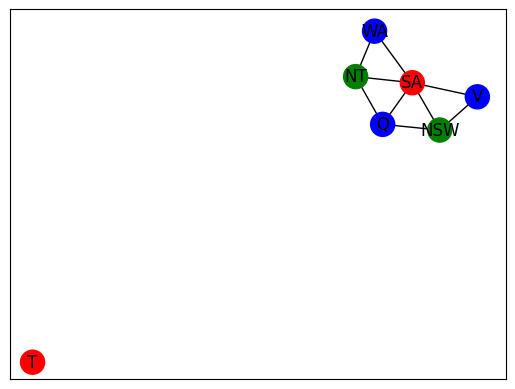

In [ ]:
abb = {
    'R': 'red',
    'G': 'green',
    'B': 'blue'
}

import networkx as nx
G1 = nx.Graph()
G1.add_nodes_from(nodes)

edges = []
for node in nodes:
  for j in australia_map[node]:
    edges.append((node,j))
G1.add_edges_from(edges)
nx.draw_networkx(G1 ,pos = nx.spring_layout(G1), node_color = [abb[x] for x in frwd_check])

# Try using backtracking --> Not working

In [ ]:
australia_map = {
    'WA': ['NT', 'SA'],
    'NT': ['WA', 'SA', 'Q'],
    'SA': ['WA', 'NT', 'Q', 'NSW', 'V'],
    'Q': ['NT', 'SA', 'NSW'],
    'NSW': ['Q', 'SA', 'V'],
    'V': ['SA', 'NSW'],
    'T': []
}

In [29]:
def neighbor(graph, node, color, color_choose):
  for child in graph[node]:
    if color_choose[node] == color:
      return False
  return True

In [30]:
def backtrack_coloring(graph, node, colors, color_choose, color_ind=0):
  color_choose[node] = colors[color_ind]
  if neighbor(graph,node,colors[color_ind], color_choose):
    backtrack_coloring(graph, node, colors, color_choose, color_ind+1)
  else:
    for child in graph[node]:
      backtrack_coloring(graph, child, colors, color_choose,0) # impl

In [31]:
def map_coloring(graph):
  colors = ["Red","Green","Blue"]
  color_choose = {node:None for node in graph}
  nodes = ['SA','NT','Q','NSW', 'WA','V','T']
  backtrack_coloring(graph, nodes[0], colors, color_choose)
  print(color_choose)
map_coloring(australia_map)

RecursionError: ignored